In [1]:
import numpy as np
import pandas as pd
import os
from re import search
import shutil
import natsort
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2

In [2]:
train=pd.read_csv(r"/content/drive/MyDrive/Datasets/plant pathology dataset/train.csv")
test=pd.read_csv(r"/content/drive/MyDrive/Datasets/plant pathology dataset/test.csv")

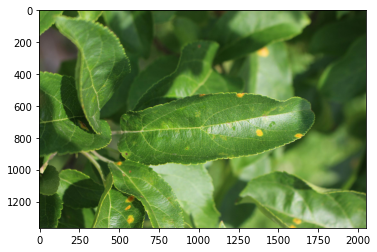

In [3]:
image1=Image.open(r'/content/drive/MyDrive/Datasets/plant pathology dataset/images/Test_0.jpg')
plt.imshow(image1)
plt.show()

In [4]:
class_names=train.loc[:,'healthy':].columns
print(class_names)

Index(['healthy', 'multiple_diseases', 'rust', 'scab'], dtype='object')


In [5]:
number=0
train['label']=0
for i in class_names:
    train['label']=train['label'] + train[i] * number
    number=number+1

In [6]:
DIR=r'/content/drive/MyDrive/Datasets/plant pathology dataset/images'

In [ ]:
natsort.natsorted(os.listdir(DIR))

In [8]:
def get_label_img(img):
    if search("Train",img):
        img=img.split('.')[0]
        label=train.loc[train['image_id']==img]['label']
        return label

In [24]:
def create_train_data():
    images=natsort.natsorted(os.listdir(DIR))
    for img in tqdm(images):
        label=get_label_img(img)
        path=os.path.join(DIR,img)
        
        if search("Train",img):
            if (img.split("_")[1].split(".")[0]) and label.item()==0:
                shutil.copy(path,r'/content/drive/MyDrive/Datasets/plant pathology dataset/images/train/healthy')
            
            elif(img.split("_")[1].split(".")[0]) and label.item()==1:
                shutil.copy(path,r'/content/drive/MyDrive/Datasets/plant pathology dataset/images/train/multiple_disease')
                
            elif(img.split("_")[1].split(".")[0]) and label.item()==2:
                shutil.copy(path,r'/content/drive/MyDrive/Datasets/plant pathology dataset/images/train/rust')
                
            elif(img.split("_")[1].split(".")[0]) and label.item()==3:
                shutil.copy(path,r'/content/drive/MyDrive/Datasets/plant pathology dataset/images/train/scab')
                
        elif search("Test",img):
            shutil.copy(path,r'/content/drive/MyDrive/Datasets/plant pathology dataset/images/test')

In [23]:
shutil.os.mkdir(r'/content/drive/MyDrive/Datasets/plant pathology dataset/images/train')
shutil.os.mkdir(r'/content/drive/MyDrive/Datasets/plant pathology dataset/images/train/healthy')
shutil.os.mkdir(r'/content/drive/MyDrive/Datasets/plant pathology dataset/images/train/multiple_disease')
shutil.os.mkdir(r'/content/drive/MyDrive/Datasets/plant pathology dataset/images/train/rust')
shutil.os.mkdir(r'/content/drive/MyDrive/Datasets/plant pathology dataset/images/train/scab')

shutil.os.mkdir(r'/content/drive/MyDrive/Datasets/plant pathology dataset/images/test')

In [25]:
train_dir=create_train_data()

100%|██████████| 3644/3644 [00:47<00:00, 76.53it/s]
